## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import math
from matplotlib.patches import Polygon
%matplotlib inline

(1280, 720)


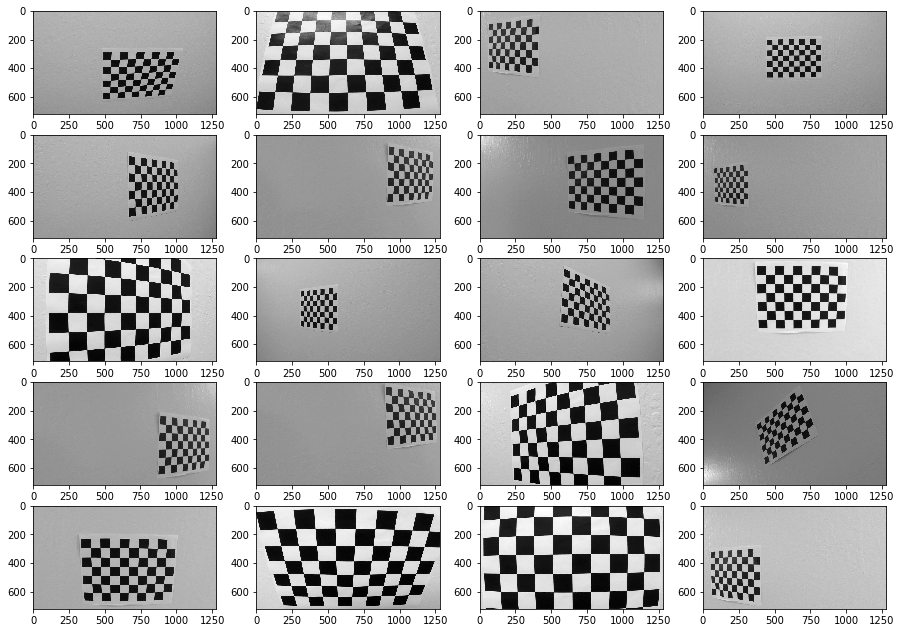

In [2]:
fname = './camera_cal/calibration5.jpg'
img = cv2.imread(fname)
img_size = (img.shape[1], img.shape[0])
print(img_size)
images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    axs[i].imshow(gray,cmap = "gray")


## To find the 3d points and 2d points

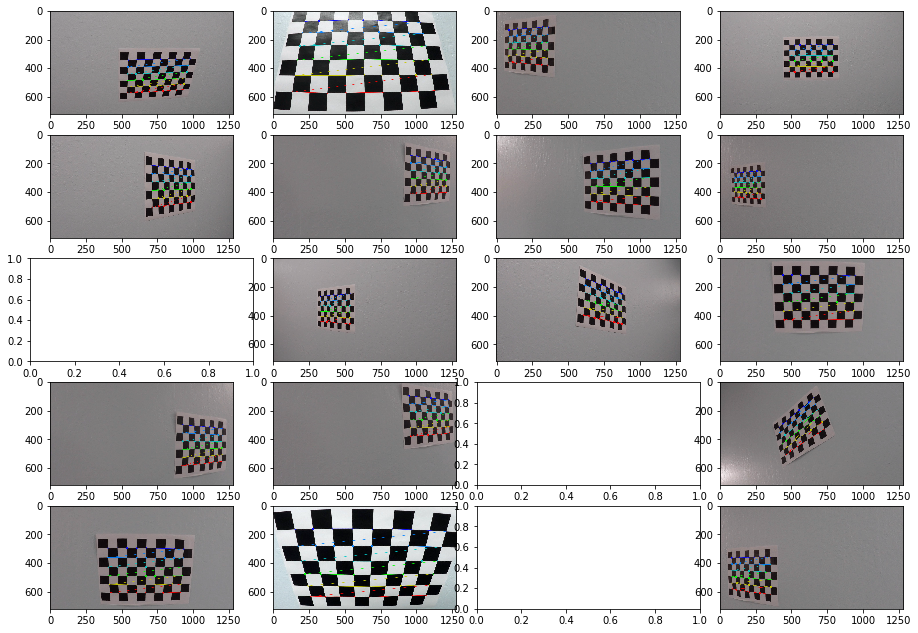

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')
fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners2, ret)
        axs[i].imshow(img)

In [4]:
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

## Undistortion

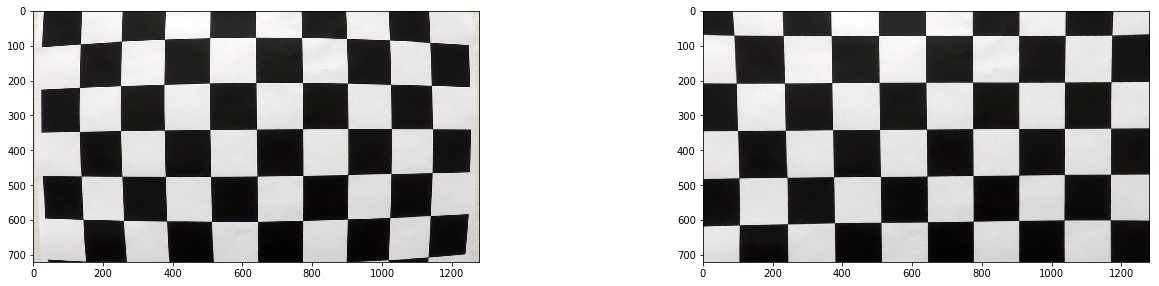

In [5]:
img = mpimg.imread('./camera_cal/calibration1.jpg')
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1],img.shape[0]),None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.5)
ax1.imshow(img)
ax2.imshow(dst)

path = './output_images/'
plt.savefig(path+'undistorted.png')

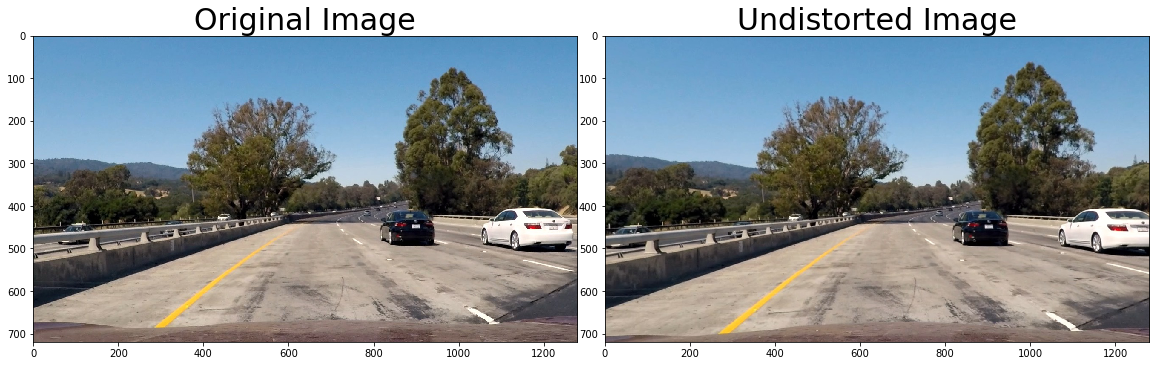

In [6]:
img_original = mpimg.imread('test_images/test1.jpg')
test = undistort(img_original)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img_original)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(test)
ax2.set_title('Undistorted Image', fontsize=30)

plt.savefig(path+'test_undistorted.png')

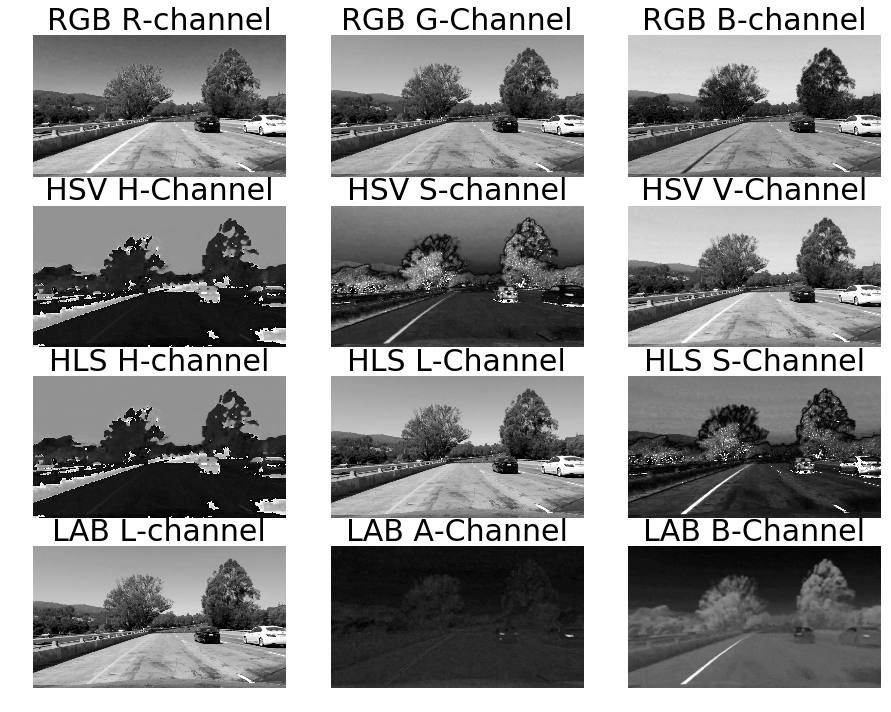

In [7]:

# (3) Color and gradient threshold
rgb = test
R = rgb[:,:,0]
G = rgb[:,:,1]
B = rgb[:,:,2]
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]
hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
HH = hls[:,:,0]
L = hls[:,:,1]
SS = hls[:,:,2]
lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
L = lab[:,:,0]
A = lab[:,:,1]
BB = lab[:,:,2]

fig, axs = plt.subplots(4,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=30)
axs[0].axis('off')
axs[1].imshow(G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[1].axis('off')
axs[2].imshow(B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=30)
axs[2].axis('off')
axs[3].imshow(H, cmap='gray')
axs[3].set_title('HSV H-Channel', fontsize=30)
axs[3].axis('off')
axs[4].imshow(S, cmap='gray')
axs[4].set_title('HSV S-channel', fontsize=30)
axs[4].axis('off')
axs[5].imshow(V, cmap='gray')
axs[5].set_title('HSV V-Channel', fontsize=30)
axs[5].axis('off')
axs[6].imshow(HH, cmap='gray')
axs[6].set_title('HLS H-channel', fontsize=30)
axs[6].axis('off')
axs[7].imshow(L, cmap='gray')
axs[7].set_title('HLS L-Channel', fontsize=30)
axs[7].axis('off')
axs[8].imshow(SS, cmap='gray')
axs[8].set_title('HLS S-Channel', fontsize=30)
axs[8].axis('off')
axs[9].imshow(L, cmap='gray')
axs[9].set_title('LAB L-channel', fontsize=30)
axs[9].axis('off')
axs[10].imshow(A, cmap='gray')
axs[10].set_title('LAB A-Channel', fontsize=30)
axs[10].axis('off')
axs[11].imshow(BB, cmap='gray')
axs[11].set_title('LAB B-Channel', fontsize=30)
axs[11].axis('off')

plt.savefig(path+'each_channels.png')

In [8]:
# functions
# sobel
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sbinary) # Remove this line
    return binary_output

# sobel_mag
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobel = np.sqrt(sobelx**2+sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    thresh_min = mag_thresh[0]
    thresh_max =mag_thresh[1]
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sbinary) # Remove this line
    return binary_output

# sobel_dir
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_x = np.absolute(sobelx)
    abs_y = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grd = np.arctan2(abs_y, abs_x)
    # 5) Create a binary mask where direction thresholds are met
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    sbinary = np.zeros_like(grd)
    sbinary[(grd >= thresh_min) & (grd <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sbinary) # Remove this line
    return binary_output

# HSV - H
def H_threshold(img, thresh=(0, 255)):
    # 1) Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    H = hsv[:,:,0]
    H = H*(255/np.max(H))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(H)
    binary_output[(H > thresh[0]) & (H <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

# HSV - S
def S_threshold(img, thresh=(0, 255)):
    # 1) Convert to HSV
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    S = S*(255/np.max(S))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

# LAB- B
def B_threshold(img, thresh=(0, 255)):
    # 1) Convert to LAB
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    B = lab[:,:,2]
    B = B*(255/np.max(B))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(B)
    binary_output[(B > thresh[0]) & (B <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

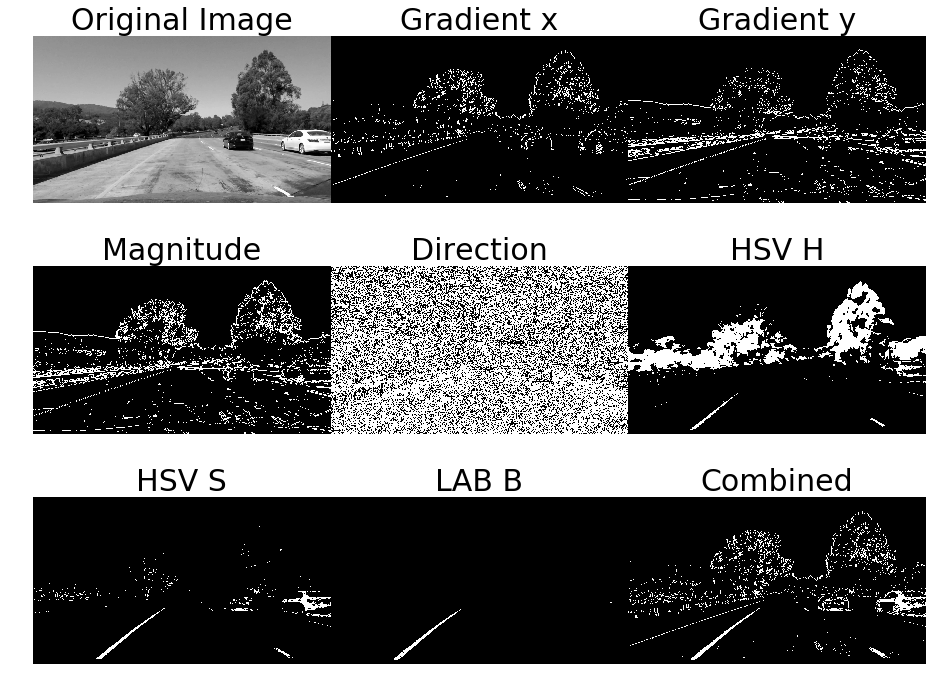

In [9]:
# Choose a Sobel kernel size
ksize = 5 # Choose a larger odd number to smooth gradient measurements
image = undistort(mpimg.imread('test_images/test1.jpg'))

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30,120))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 120))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.5, 1.5))
H_binary = H_threshold(image, thresh=(30, 100))
S_binary = S_threshold(image, thresh=(180, 255))
B_binary = B_threshold(image, thresh=(205, 255))
combined = np.zeros_like(dir_binary)
# combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | ((H_binary == 1) | (S_binary == 1))] = 1
# combined[(S_binary == 1)] = 1
# combined[((H_binary == 1) | (S_binary == 1))] = 1
# combined[((gradx == 1) | (S_binary == 1))] = 1
combined[((S_binary == 1) | (B_binary == 1) | (gradx == 1))] = 1

fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap='gray')
axs[0].set_title('Original Image', fontsize=30)
axs[0].axis('off')
axs[1].imshow(gradx, cmap='gray')
axs[1].set_title('Gradient x', fontsize=30)
axs[1].axis('off')
axs[2].imshow(grady, cmap='gray')
axs[2].set_title('Gradient y', fontsize=30)
axs[2].axis('off')
axs[3].imshow(mag_binary, cmap='gray')
axs[3].set_title('Magnitude', fontsize=30)
axs[3].axis('off')
axs[4].imshow(dir_binary, cmap='gray')
axs[4].set_title('Direction', fontsize=30)
axs[4].axis('off')
axs[5].imshow(H_binary, cmap='gray')
axs[5].set_title('HSV H', fontsize=30)
axs[5].axis('off')
axs[6].imshow(S_binary, cmap='gray')
axs[6].set_title('HSV S', fontsize=30)
axs[6].axis('off')
axs[7].imshow(B_binary, cmap='gray')
axs[7].set_title('LAB B', fontsize=30)
axs[7].axis('off')
axs[8].imshow(combined, cmap='gray')
axs[8].set_title('Combined', fontsize=30)
axs[8].axis('off')

plt.savefig(path+'thresholded_img.png')

In [11]:
def filter_function(image,ksize):
    # Apply each of the thresholding functions
    image = undistort(image)
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20,100))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.5, 1.5))
    H_binary = H_threshold(image, thresh=(30, 100))
    S_binary = S_threshold(image, thresh=(170, 255))
    B_binary = B_threshold(image, thresh=(200, 255))
    combined = np.zeros_like(dir_binary)
    # combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | ((H_binary == 1) | (S_binary == 1))] = 1
    # combined[(S_binary == 1)] = 1
    # combined[((H_binary == 1) | (S_binary == 1))] = 1
    # combined[((gradx == 1) | (S_binary == 1))] = 1
    
    combined[((S_binary == 1) | (B_binary == 1) | (gradx == 1))] = 1
    return combined

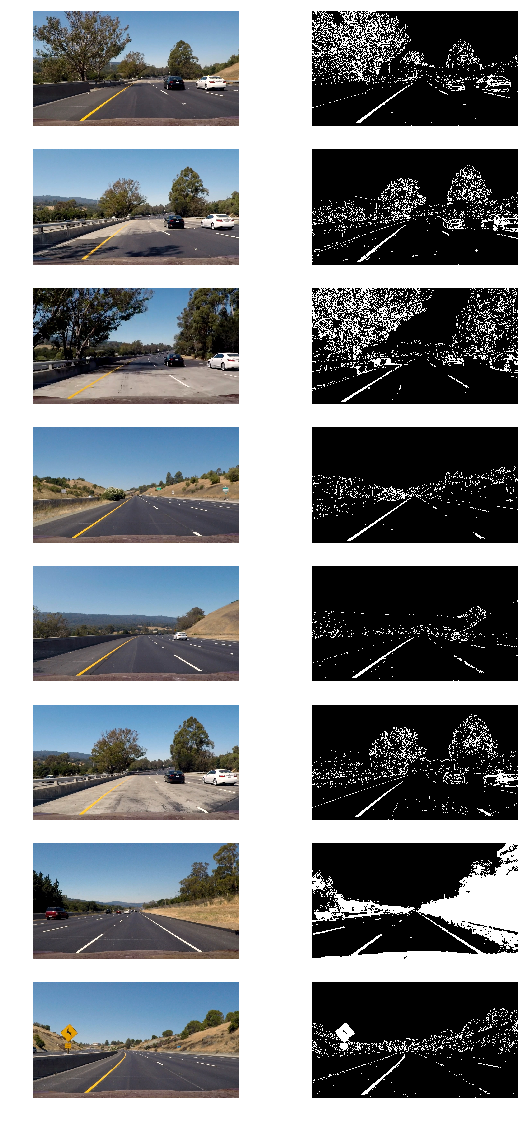

In [12]:
# Make a list of example images
images = glob.glob('test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
i = 0
ksize = 3
for image in images:
    img = mpimg.imread(image)
    img_bin = filter_function(img, ksize)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    
plt.savefig(path+'threshold_imgs.png')

In [13]:
# Define perspective transform function
def warp_function(img, src=None, dst=None):
    # Define calibration box in source (original) and destination (desired or warped) coordinates
    img_size = (img.shape[1], img.shape[0])
    
    
    if src is None:
        src = np.float32(
            [[235,  700],  # Bottom left
             [535,  480],  # Top left
             [745,  480],  # Top right
             [1200, 700]]) # Bottom right
        
    if dst is None:
        dst = np.float32(
            [[250,  720],  # Bottom left
             [250,    0],  # Top left
             [1065,   0],  # Top right
             [1065, 720]]) # Bottom right   

    # Compute the perspective transfor, M
    M = cv2.getPerspectiveTransform(src, dst)

    
    # Compute the inverse perspective transfor also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image - uses linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M, Minv

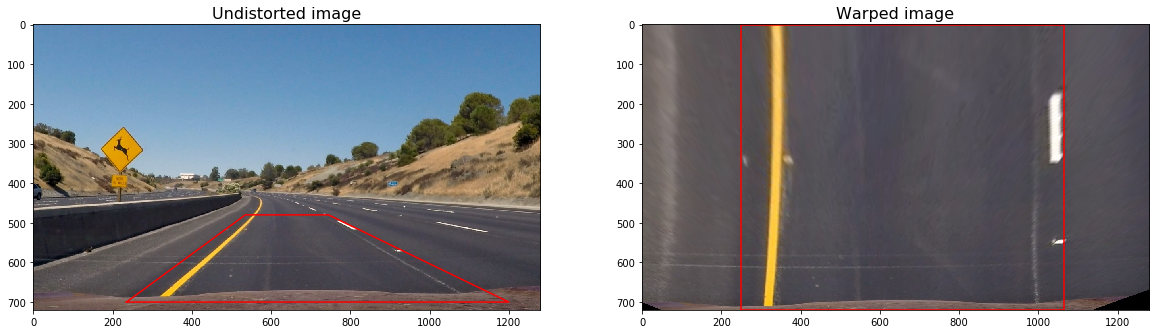

In [14]:
src = np.float32(
    [[235,  700],  # Bottom left
     [535,  480],  # Top left
     [745,  480],  # Top right
     [1200, 700]]) # Bottom right

dst= np.float32(
    [[250,  720],  # Bottom left
     [250,    0],  # Top left
     [1065,   0],  # Top right
     [1065, 720]]) # Bottom right   

warped_img, _ , Minv  = warp_function(img, src, dst)

# Visualize undirstorsion
# Notice 'img' was undistorted at the beginning
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Undistorted image', fontsize=16)
ax1.plot(Polygon(src).get_xy()[:, 0], Polygon(src).get_xy()[:, 1], color='red')
ax1.imshow(img)

ax2.set_title('Warped image', fontsize=16)
ax2.plot(Polygon(dst).get_xy()[:, 0], Polygon(dst).get_xy()[:, 1], color='red')
ax2.imshow(warped_img)

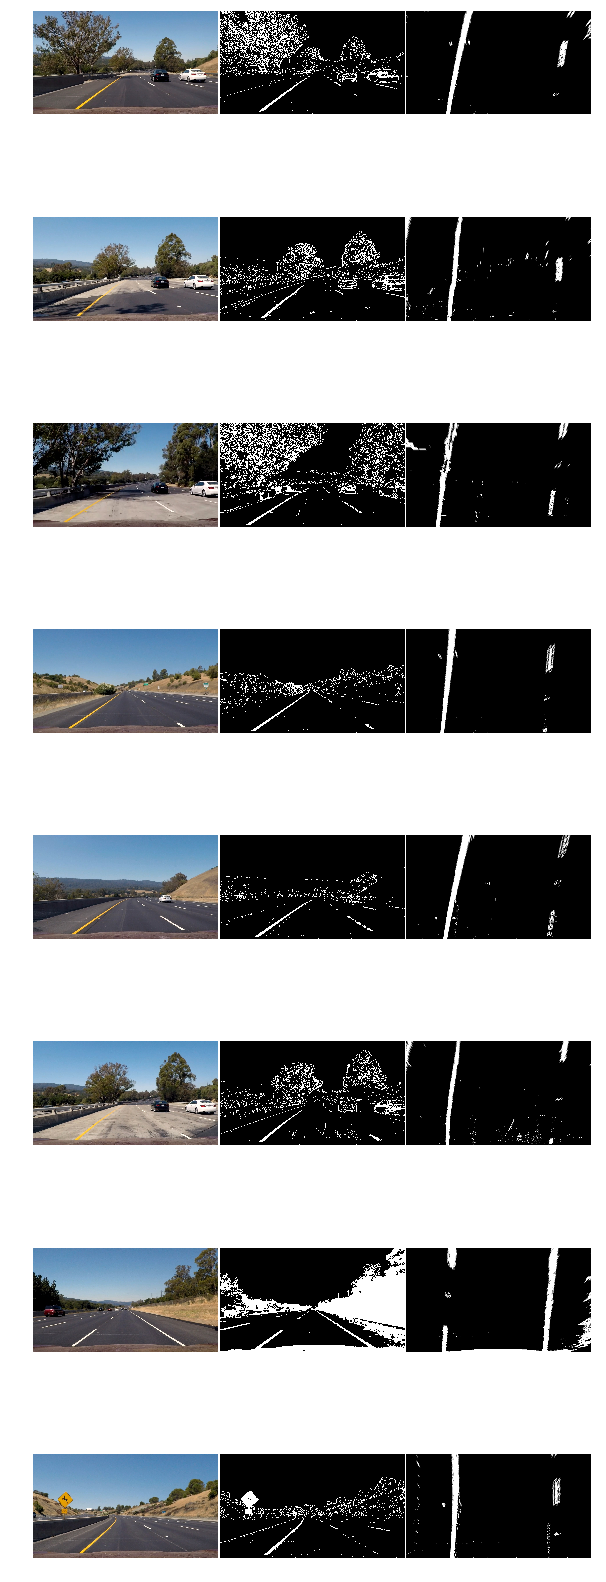

In [15]:
# Make a list of example images
images = glob.glob('test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),3, figsize=(10, 30))
fig.subplots_adjust(hspace = .1, wspace=.01)
axs = axs.ravel()
                  
i = 0
ksize = 3
for image in images:
    img = mpimg.imread(image)
    img_bin = filter_function(img, ksize)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    img_unwarp, M ,Minv= warp_function(img_bin, src, dst)
    axs[i].imshow(img_unwarp, cmap='gray')
    axs[i].axis('off')
    i += 1
plt.savefig(path+'bird_eye_imgs.png')

In [19]:
#Defining a class for easy access to required state
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = np.array([0,0,0], dtype='float') 
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None
        #y values for detected line pixels
        self.ally = None

In [20]:
#Creating two instances one for left and one for right
l_line = Line()
r_line = Line()

In [21]:
def Advanced_lane_detection_core_fun(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    out_img = out_img.astype(np.uint8)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 10
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 35

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        # Find the four below boundaries of the window
        win_xleft_low = leftx_current - margin  
        win_xleft_high = leftx_current + margin 
        win_xright_low = rightx_current - margin  
        win_xright_high = rightx_current + margin  
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    leftx, lefty, rightx, righty, out_img = Advanced_lane_detection_core_fun(binary_warped)
    # If x points satisfying the condition for left line are found
    if leftx.size != 0:
        left_fit = np.polyfit(lefty, leftx ,2)
    else:
        leftx = l_line.allx
        lefty= l_line.ally
        left_fit = l_line.current_fit
        
    # If x points satisfying the condition for right line are found
    if rightx.size != 0:
        right_fit = np.polyfit(righty, rightx ,2)
    else :
        rightx = r_line.allx
        righty= r_line.ally
        right_fit = r_line.current_fit

    # Generate x and y values for plotting
    # ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] ) 
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        l_line.detected = True
        r_line.detected = True
        l_line.allx = leftx
        l_line.ally = lefty
        r_line.allx = rightx
        r_line.ally = righty
        l_line.current_fit = left_fit
        r_line.current_fit = right_fit
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        
    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    return out_img, left_fit, right_fit, left_fitx, right_fitx

## Histogram


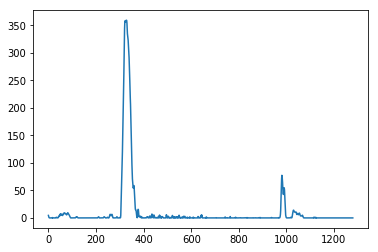

In [22]:
img = mpimg.imread('test_images/test2.jpg')
img_bin = filter_function(img, ksize)
img_unwarp, M,Minv  = warp_function(img_bin, src, dst)
ploty = np.linspace(0, img_unwarp.shape[0]-1, img_unwarp.shape[0])
histogram = np.sum(img_unwarp[img_unwarp.shape[0]//2:,:], axis=0)
plt.plot(histogram)
leftx, lefty, rightx, righty, out_img = Advanced_lane_detection_core_fun(img_unwarp)
out_img, left_fit, right_fit, left_fitx, right_fitx  = fit_polynomial(img_unwarp)

## Line Fitting and Window Fitting

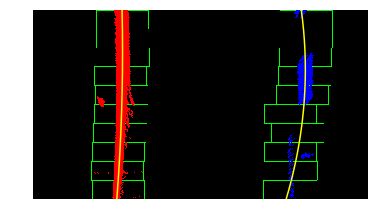

In [23]:

# Plots the left and right polynomials on the lane lines
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(out_img)
plt.axis('off')
plt.savefig(path+'fit_curve.png')

In [24]:
def Parabola_fun(img_shape, leftx, lefty, rightx, righty):
    # Fit a second order polynomial to each with np.pol()
    if leftx.size != 0:
            left_fit = np.polyfit(lefty, leftx ,2)
    else:
        leftx = l_line.allx
        lefty= l_line.ally
        left_fit = l_line.current_fit
        
    if rightx.size != 0:
        right_fit = np.polyfit(righty, rightx ,2)
    else:
        rightx = r_line.allx
        righty= r_line.ally
        right_fit = r_line.current_fit
        
    # Generate x and y values for plotting
    # ploty = np.linspace(0, img_shape[0]-1, img_shape[0])

    left_fitx = left_fit[0] * ploty**2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty**2 + right_fit[1] * ploty + right_fit[2]
    
    return left_fitx, right_fitx, left_fit, right_fit

def search_around_curve(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 80

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Set the area of search based on activated x-values
    # within the +/- margin of our polynomial function
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    

    # Fit new polynomials
    # If x points satisfying the condition for each line are found
    if leftx.size != 0 or rightx.size != 0:
        left_fitx2, right_fitx2, left_fit2, right_fit2 = Parabola_fun(binary_warped.shape, leftx, lefty, rightx, righty)
        # difference in fit coefficients between last and new fits
        l_line.diffs = l_line.current_fit - left_fit2
        r_line.diffs = r_line.current_fit - right_fit2
        
        # If difference between last and new fits is large, line is not updated
        if np.sum(np.abs(l_line.diffs)) < 100  or np.sum(np.array(r_line.diffs)) < 100 :    
            l_line.allx = leftx
            l_line.ally = lefty
            r_line.allx = rightx
            r_line.ally = righty
            l_line.current_fit = left_fit2
            r_line.current_fit = right_fit2
        # else, line is updated
        else :
            leftx = l_line.allx
            lefty= l_line.ally
            rightx = r_line.allx
            righty= r_line.ally
            left_fit2 = l_line.current_fit
            right_fit2 = r_line.current_fit
            l_line.diffs = l_line.current_fit - left_fit2
            r_line.diffs = r_line.current_fit - right_fit2
            left_fitx2 = left_fit2[0] * ploty**2 + left_fit2[1] * ploty + left_fit2[2]
            right_fitx2 = right_fit2[0] * ploty**2 + right_fit2[1] * ploty + right_fit2[2]  
    # If x points satisfying the condition are not found
    else :
        leftx = l_line.allx
        lefty= l_line.ally
        rightx = r_line.allx
        righty= r_line.ally
        left_fit2 = l_line.current_fit
        right_fit2 = r_line.current_fit
        l_line.diffs = l_line.current_fit - left_fit2
        r_line.diffs = r_line.current_fit - right_fit2
        left_fitx2 = left_fit2[0] * ploty**2 + left_fit2[1] * ploty + left_fit2[2]
        right_fitx2 = right_fit2[0] * ploty**2 + right_fit2[1] * ploty + right_fit2[2]
        l_line.detected = False
        r_line.detected = False
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx2-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx2+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx2-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx2+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result, left_fit2, right_fit2, left_fitx2, right_fitx2

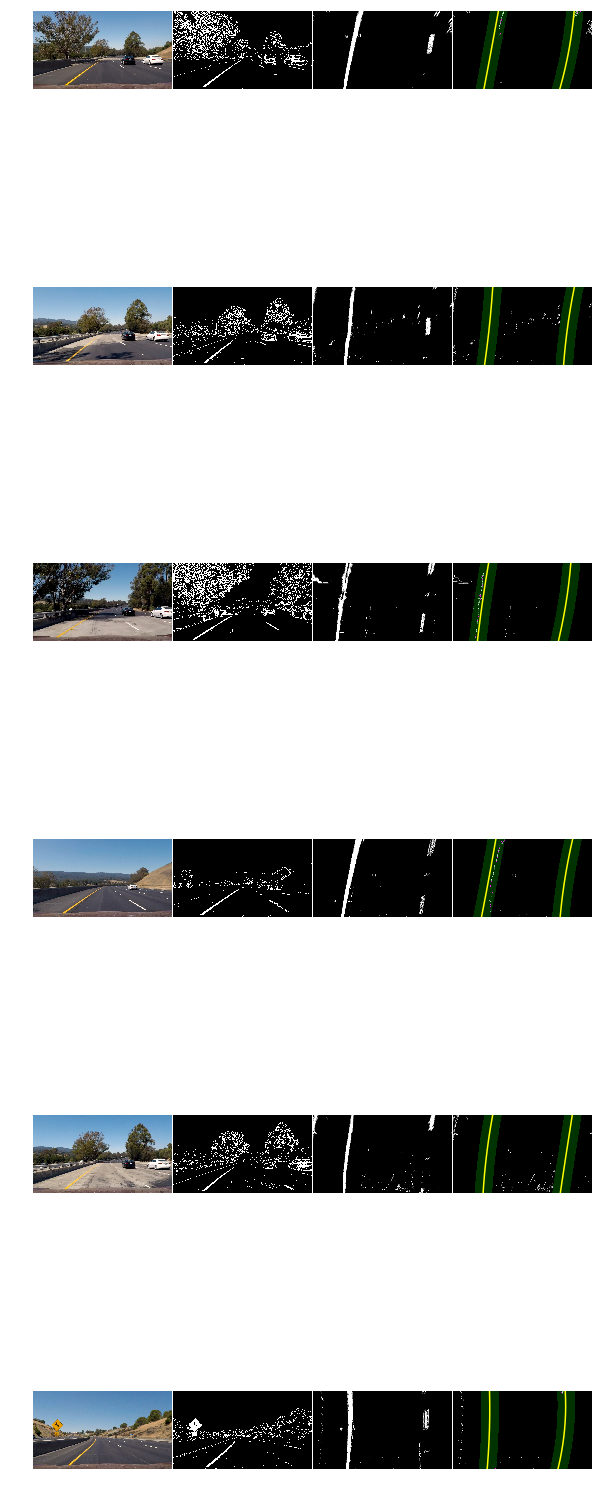

In [25]:
images =glob.glob('test_images/test*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),4, figsize=(10, 30))
fig.subplots_adjust(hspace = .1, wspace=.01)
axs = axs.ravel()
                  
i = 0
ksize = 3
for image in images:
    img = mpimg.imread(image)
    img_bin = filter_function(img, ksize)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    img_unwarp, M,Minv = warp_function(img_bin, src, dst)
    axs[i].imshow(img_unwarp, cmap='gray')
    axs[i].axis('off')
    i += 1
    out_img, left_fit, right_fit, left_fitx, right_fitx  = search_around_curve(img_unwarp)
    axs[i].imshow(out_img)
    axs[i].plot(left_fitx, ploty, color='yellow')
    axs[i].plot(right_fitx, ploty, color='yellow')
    axs[i].axis('off')
    i += 1
plt.savefig(path+'line_drawed_imgs.png')

In [26]:

h,w = img_bin.shape[:2]

In [27]:
def curvature_radius (leftx, rightx, img_shape, xm_per_pix=3.7/800, ym_per_pix = 25/720):
    ploty = np.linspace(0, img_shape[0] - 1, img_shape[0])
    
    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
    
    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 25/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/800 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    y_eval = np.max(ploty)
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    l_line.radius_of_curvature = left_curverad
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    r_line.radius_of_curvature = right_curverad
    # Now our radius of curvature is in meters
    car_position = img.shape[1]/2
    l_fit_x_int = left_fit_cr[0]*h**2 + left_fit_cr[1]*h + left_fit_cr[2]
    r_fit_x_int = right_fit_cr[0]*h**2 + right_fit_cr[1]*h + right_fit_cr[2]
    l_line.line_base_pos = np.absolute(l_fit_x_int - car_position)* xm_per_pix
    r_line.line_base_pos = np.absolute(r_fit_x_int - car_position)* xm_per_pix
    lane_center_position = (r_fit_x_int + l_fit_x_int) /2
    center_err = (car_position - lane_center_position) * xm_per_pix
    
    return (left_curverad, right_curverad,center_err)

In [28]:
# Run the function
curvature_rads = curvature_radius(leftx=left_fitx, rightx=right_fitx, img_shape = img.shape)

# Print the results
print('Left line curvature:', curvature_rads[0], 'm')
print('Right line curvature:', curvature_rads[1], 'm')

Left line curvature: 1681.22935555 m
Right line curvature: 626.188440156 m


In [29]:
def car_offset(leftx, rightx, img_shape, xm_per_pix=3.7/800):
    ## Image mid horizontal position 
    mid_imgx = img_shape[1]//2
        
    ## Car position with respect to the lane
    car_pos = (leftx[-1] + rightx[-1])/2
    
    ## Horizontal car offset 
    offsetx = (mid_imgx - car_pos) * xm_per_pix

    return offsetx

In [30]:
offsetx = car_offset(leftx=left_fitx, rightx=right_fitx, img_shape=img.shape)

print ('Car offset from center:', offsetx, 'm.')

Car offset from center: -0.0250914167765 m.


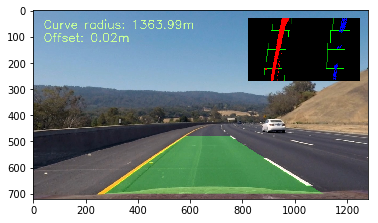

In [31]:
img = mpimg.imread('test_images/test3.jpg')

def pipeline(img):
    # Integrate above functions
    undist = undistort(img) #Get undistorted image
    img_bin = filter_function(undist, ksize) # Get thresholded binary image
    img_unwarp, M ,Minv = warp_function(img_bin, src, dst) # Get unwarped(warped? bird eye?) image
    out_img, left_fit, right_fit, left_fitx, right_fitx  = fit_polynomial(img_unwarp) # Get line fitted to 2nd order polynominal

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(img_unwarp).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    offsetx = car_offset(leftx=left_fitx, rightx=right_fitx, img_shape=img.shape)
    # Culecurate curveture and vehicle position 
    left_curverad2, right_curverad2,center_err = curvature_radius(leftx=left_fitx, rightx=right_fitx, img_shape = img.shape)
    curv_rad = (left_curverad2 + right_curverad2)/2
    
    # Text it on result image
    texted_img = Text_on_frame(result,offsetx, curv_rad, center_err,np.sum(np.abs(l_line.diffs)), np.sum(np.abs(r_line.diffs)))

    # Bird eye image drown on result image
    size = (int(result.shape[1]/3), int(result.shape[0]/3))
    cliped_img = add_clip_image(size[0]*2-30, 30, result, cv2.resize(out_img, size))

    return cliped_img

def Text_on_frame(result,offsetx, curv_rad,center_err, left_dif, right_dif):
    h = result.shape[0]
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(result, text, (40,70),font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    abs_center_err = abs(center_err)
    text = 'Offset: ' + '{:04.2f}'.format(offsetx) + 'm'
    cv2.putText(result, text, (40,120),font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return result

def add_clip_image(x, y, back, fore):
    h, w, _ = fore.shape
    back[y:y+h, x:x+w] = fore
    cliped_img = back
    return cliped_img

cliped_img = pipeline(img)
plt.imshow(cliped_img)
plt.savefig(path+'result.png')

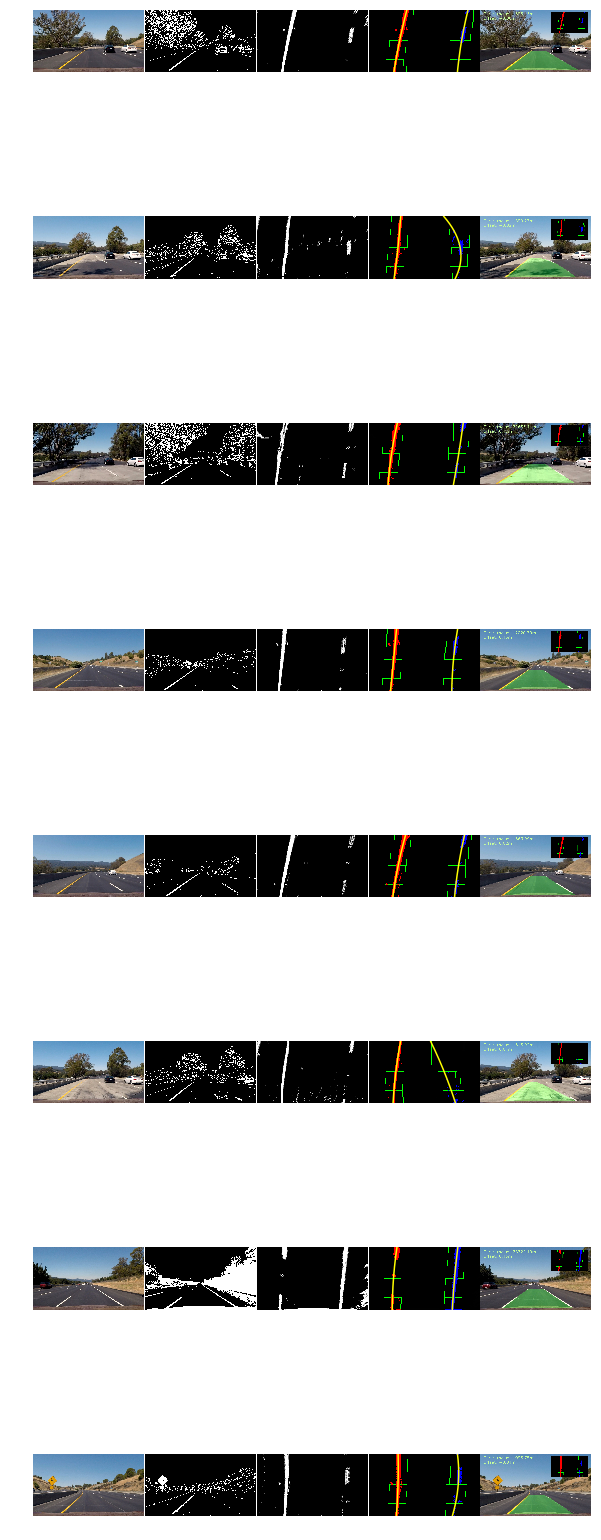

In [32]:
# Make a list of example images
images = glob.glob('test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),5, figsize=(10, 30))
fig.subplots_adjust(hspace = .1, wspace=.01)
axs = axs.ravel()
                  
i = 0
ksize = 3
for image in images:
    img = mpimg.imread(image)
    img_bin = filter_function(img, ksize)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    img_unwarp, M, Minv = warp_function(img_bin, src, dst)
    axs[i].imshow(img_unwarp, cmap='gray')
    axs[i].axis('off')
    i += 1
    out_img, left_fit, right_fit, left_fitx, right_fitx  = fit_polynomial(img_unwarp)
    axs[i].imshow(out_img)
    axs[i].plot(left_fitx, ploty, color='yellow')
    axs[i].plot(right_fitx, ploty, color='yellow')
    axs[i].axis('off')
    i += 1
    result = pipeline(img)
    axs[i].imshow(result)
    axs[i].axis('off')
    i += 1
plt.savefig(path+'result_imgs.png')

In [33]:
def pipeline4video(img):
    # Integrate above functions
    undist = undistort(img) #Get undistorted image
    img_bin = filter_function(undist, ksize) # Get thresholded binary image
    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(img_bin.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    img_unwarp, M, Minv  = warp_function(closing, src, dst) 

    # Get line fitted to 2nd order polynominal
    # If line was not detected in last processing (ine.detected = Fase)
    if not l_line.detected or not r_line.detected:
        # Search from scratch
        out_img, left_fit, right_fit, left_fitx, right_fitx  = fit_polynomial(img_unwarp)
    # If line was detected in last processing (ine.detected = True)
    else:
        # Search near 
        out_img, left_fit, right_fit, left_fitx, right_fitx = search_around_curve(img_unwarp)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(img_unwarp).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)

    # Curveture
    left_curverad2, right_curverad2,center_err = curvature_radius(leftx=left_fitx, rightx=right_fitx, img_shape = img.shape)
    curv_rad = (left_curverad2 + right_curverad2)/2

    texted_img = Text_on_frame(result,offsetx, curv_rad, center_err, np.sum(np.abs(l_line.diffs)), np.sum(np.abs(r_line.diffs)))
    
    size = (int(result.shape[1]/3), int(result.shape[0]/3))
    cliped_img = add_clip_image(size[0]*2-30, 30, result, cv2.resize(out_img, size))

    return cliped_img

In [34]:

l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(pipeline4video)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [07:48<00:00,  2.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 5min 6s, sys: 33.6 s, total: 5min 40s
Wall time: 7min 51s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output1))

In [33]:
l_line = Line()
r_line = Line()
video_output2 = 'challenge_video_output.mp4'
video_input2 = VideoFileClip('challenge_video.mp4')#.subclip(10,12)
processed_video = video_input2.fl_image(pipeline4video)
%time processed_video.write_videofile(video_output2, audio=False)


[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


100%|██████████| 485/485 [02:51<00:00,  2.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

CPU times: user 1min 59s, sys: 5.52 s, total: 2min 5s
Wall time: 2min 53s


In [34]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output2))

In the above video since the frames look dull, we have to adaptively change the thresholding to impprove the accuracy, can be done if we write another function to compensate for the brightness factor to bump up the contrast or other params


In [35]:
l_line = Line()
r_line = Line()
video_output3 = 'harder_challenge_video.mp4'
video_input3 = VideoFileClip('harder_challenge_video.mp4')#.subclip(10,12)
processed_video = video_input3.fl_image(pipeline4video)
%time processed_video.write_videofile(video_input3, audio=False)


TypeError: expected str, bytes or os.PathLike object, not VideoFileClip

In [36]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output3))

## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./examples/undistort_output.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"

## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points

### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---

### Writeup / README



### Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image. Thus, objp is just a replicated array of coordinates, and objpoints will be appended with a copy of it every time I successfully detect all chessboard corners in a test image. imgpoints will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

I then used the output objpoints and imgpoints to compute the camera calibration and distortion coefficients using the cv2.calibrateCamera() function. I applied this distortion correction to the test image using the cv2.undistort() function and obtained this result:
![image1](./output_images/undistorted.png)

#### 1. Provide an example of a distortion-corrected image.

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
```python
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
```
The code for my corecting distortion includes a function called `undist()`, which appears in 1st line in a function `pipeline()`.
This function's input is an image `img` and output is undistorted image `undist`, like`undist = undistort(img)`.

![image2](./output_images/test_undistorted.png)

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.

I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines 3 through 9 in function `filter_function()`).  Here's an example of my output for this step. 
And I used combined imgage of Gradinet x, HSV-S and LAB-B.

The code `filter_function()` appears in 2nd line in a function `pipeline()`.
This function's input is a distorted image `img` and gaussian blur kernel size `ksize`, and output is a binary image `img_bin`, like `img_bin = filter_function(img, ksize)`.

![alt text](./output_images/thresholded_img.png)

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called `warp_function()`, which appears in 3rd line in a function `pipeline()`. The `warp_function()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```python
        src_coordinates = np.float32(
            [[280,  700],  # Bottom left
             [595,  460],  # Top left
             [725,  460],  # Top right
             [1125, 700]]) # Bottom right

        dst_coordinates = np.float32(
            [[250,  720],  # Bottom left
             [250,    0],  # Top left
             [1065,   0],  # Top right
             [1065, 720]]) # Bottom right  
```

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 280,  700      | 250,  720       | 
| 595,  460      | 250,    0      |
| 725,  460     | 1065,   0      |
| 1125, 700      | 1065, 720        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

`img_unwarp, M, Minv  = warp_function(img_bin, src, dst)`: inputs are binary image, src and dst. outputs are warped image, transform matrix and inverse transform matrix.

![image4](./output_images/bird_eye.png)

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

I identified lane line pixcels and fit their positions with a polynomial using a function `fit_polynomial()`, which appears in 4th line in a function `pipeline()`. 

First of all, I calcurate histogram for holizontal direction in warped binary image to search starting point for the left and right lines. Then using "window search", I search points in lane area satisfying conditions (at 1st line in `fit_polynomial()` using in a function `Advanced_lane_detection_core_fun()`. ). Finally, all the points are fitted in 2nd polynominal for lane finding (at lines 4 through 19 in function `fit_polynomial()`).

`out_img, left_fit, right_fit, left_fitx, right_fitx  = fit_polynomial(img_unwarp)`: input is a warped image, outputs are line-drawn image (shown following) and fitted lines prams.

`leftx, lefty, rightx, righty, out_img = Advanced_lane_detection_core_fun(binary_warped)`: input is a binary image. outputs are warped image, transform matrix and inverse transform matrix.

![images5](./output_images/fit_curve.png)

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in 24 lines in `pipeline()` in `curvature_radius()`

`left_curverad2, right_curverad2,center_err = curvature_radius(leftx=left_fitx, rightx=right_fitx, img_shape = img.shape)`: inputs are a binary image, y points in fitted curve and left and right line. Outputs are curvature of left and right line and vehicle position from center.

#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines 18 through 21 in my code in `pipeline()`.  Here is an example of my result on a test image:

![image6](./output_images/result.png)

---
### Pipeline (video)

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

Here's a [link to my video result](./project_video_output.mp4)

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  

* the approach I took, 

I think most effective point for improving line finding is using "thresholds of HSV and x gradient" to extract binary image.
And this time, the coffients of 2nd polynominal for each frame are compared, and when a change exceeding a certain value occurs 

* where the pipeline might fail and how I might improve it if I were going to pursue this project further.  

(1) Lost lines by brightness change: should change thresholds adaptively.

(2) Road with small curveture: I will change ROI adaptively. 

(3) Other vehicles's influences: I will detect other vihicles and ignore that.

I think with other sensor informations we can improvise this algorithm.